In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

from colorthief import ColorThief
import matplotlib.pyplot as plt
import colorsys
import webcolors

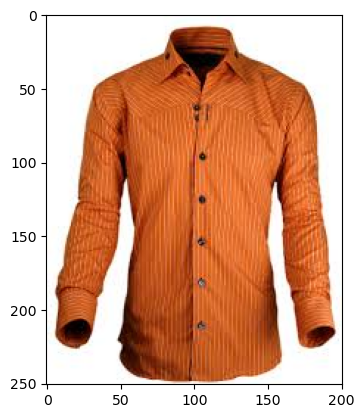

In [6]:
mg = image.load_img("Downloads/Db/training/Shirt/20.jpeg")
image = cv2.imread("Downloads/Db/training/Shirt/20.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [7]:
train= ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [8]:
train_data=train.flow_from_directory("Downloads/Db/training/",
                                     target_size=(200,200),
                                     batch_size=3,
                                     class_mode='binary')
validation_dataset=train.flow_from_directory("Downloads/Db/validation/",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 33 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [9]:
train_data.class_indices

{'Pant': 0, 'Shirt': 1}

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation ="relu",input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation= 'relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [11]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])


In [12]:
model_fit = model.fit(train_data,
                   steps_per_epoch=3,
                   epochs=30,
                   validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 4s 421ms/step - loss: 14.4196 - accuracy: 0.5556
Epoch 2/30
3/3 [==============================] - 1s 373ms/step - loss: 1.8009 - accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 1s 359ms/step - loss: 0.6864 - accuracy: 0.7778
Epoch 4/30
3/3 [==============================] - 1s 373ms/step - loss: 0.7306 - accuracy: 0.5556
Epoch 5/30
3/3 [==============================] - 1s 384ms/step - loss: 0.4954 - accuracy: 0.7778
Epoch 6/30
3/3 [==============================] - 1s 396ms/step - loss: 0.6108 - accuracy: 0.6667
Epoch 7/30
3/3 [==============================] - 1s 392ms/step - loss: 0.5432 - accuracy: 0.7778
Epoch 8/30
3/3 [==============================] - 1s 472ms/step - loss: 0.3050 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================] - 1s 376ms/step - loss: 0.3999 - accuracy: 0.7778
Epoch 10/30
3/3 [==============================] - 1s 454ms/step - loss: 0.2265 - accuracy: 1.0000
Epoch 11/30
3/3 [=

2.jpg


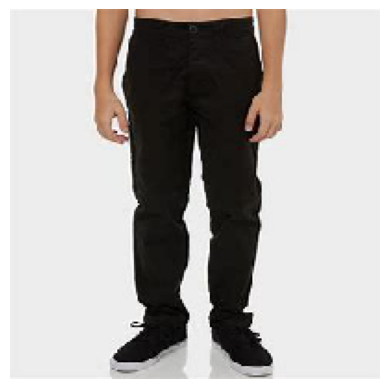

1/1 [==============================] - 0s 58ms/step
It is pant
red.jpg


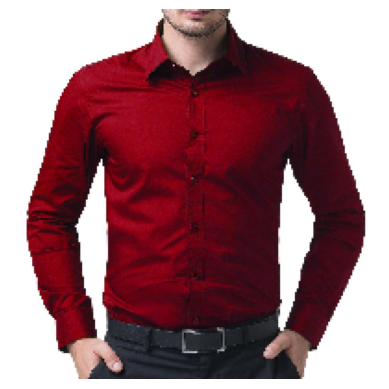

1/1 [==============================] - 0s 58ms/step
It is shirt


In [23]:
dir_path='Downloads/Db/test'
shirt=[]
pant=[]
for i in os.listdir(dir_path ):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    print(i)
    plt.axis("off")
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val=model.predict(images)
    if val==0:
        print("It is pant")
    else:
        print("It is shirt")

In [24]:
a=[]
# Load the image
for i in os.listdir(dir_path):
    img=ColorThief(dir_path+'//'+i)
    print(i)
    dominant_color = img.get_color(quality=1)
    dominant_color_hex = "#{:02x}{:02x}{:02x}".format(*dominant_color)

    print("Dominant Color:", dominant_color_hex)
    a.append(dominant_color_hex)
print(a)

2.jpg
Dominant Color: #181513
red.jpg
Dominant Color: #440e19
['#181513', '#440e19']


In [25]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def color_similarity(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    distance = ((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2) ** 0.5
    return 100 - (distance / (255 * 3)) * 100

shirt_color_hex = a[0]
pant_color_hex = a[1]

shirt_color_rgb = hex_to_rgb(shirt_color_hex)
pant_color_rgb = hex_to_rgb(pant_color_hex)

similarity_percentage = color_similarity(shirt_color_rgb, pant_color_rgb)
print("Percentage of the color match:", similarity_percentage, "%")

Percentage of the color match: 94.12345966196365 %
